<a href="https://colab.research.google.com/github/rachelpower2307/Rachel/blob/master/ReactorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
from numpy.random import default_rng
rng = default_rng()

#Sampling Initial Energy

### Task 1A - Derive the Cumulative Probability Finction and its Inverse

In [41]:
E_min, E_max = 0.001, 2.5

def f(E, E_min=E_min, E_max=E_max):
  assert E_min<=E<=E_max, f"Invalid input {E} to F, expected in interval {E_min}...{E_max}"

  c = 0.5 / (np.sqrt(E_max)-np.sqrt(E_min))
  return c / (np.sqrt(E))

f = np.vectorize(f)

def  F_inverse(U, E_min=E_min, E_max=E_max):
  assert 0<=U<=1, f"Invalid input {U} to F_inverse, expected in interval 0...1"

  c = 0.5 / (np.sqrt(E_max)-np.sqrt(E_min))

  return (np.sqrt(E_min) + U / (2*c) )**2
F_inverse = np.vectorize(F_inverse)

In [42]:
F(F_inverse(0.9))

array(0.9)

### Task 1B - Derive the expected value and the variance of the CDF


In [39]:
#^^^^^^

###Task 1C — Verify generated samples follows the required distribution

In [47]:
n = 10_000

E_min = 0.001
E_max = 2.5

# observed frequency
uValues = rng.uniform(size=n)
EValues = F_inverse(uValues, E_min=E_min, E_max=E_max)

# expected frequency
xValues = x = np.linspace(E_min, E_max)
fValues = f(x)

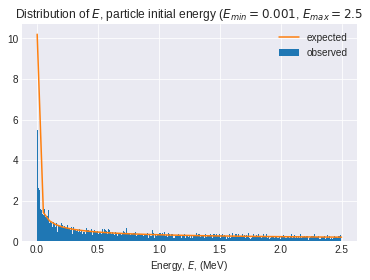

In [53]:
plt.hist(EValues, bins=500, density=True, label='observed')
plt.plot(xValues, fValues, label='expected')
plt.legend()
plt.title("Distribution of $E$, particle initial energy ($E_{min}=%s$, $E_{max}=%s$" %(E_min, E_max))
plt.xlabel("Energy, $E$, (MeV)")
plt.show()

### Task 1D — Verify that generated samples match expected mean and standard deviation

In [57]:
 E_min, E_max = 0.001, 2.5

 c = 0.5 / (np.sqrt(E_max)-np.sqrt(E_min))

 exp_mean = 2/3 * c * (np.power(E_max, 3/2) - np.power(E_min, 3/2))
 exp_std = 0

n = 10_000

E_min = 0.001
E_max = 2.5

# observed frequency
uValues = rng.uniform(size=n)
EValues = F_inverse(uValues, E_min=E_min, E_max=E_max)

obs_mean = EValues.mean()
obs_std = EValues.std()

print(f"Observed mean = {obs_mean:.4f} and std = {obs_std:4f}")
print(f"Expected mean = {exp_mean:.4f} and std = {exp_std:4f}")

Observed mean = 0.8482973780265178 and std = 0.7445967659953391
Expected mean = 0.8503333333333334 and std = 0


# Generate Particles

### Task 2A — Using a class to simplify storing of particle data

In [63]:
class Particle():
    pass

  def __init__(self):
    self.x = 0
    self.y = 0
   self.z = 0
    self.mu = 0
   self.azim = 0
    self.energy = 1

  def __repr__(self):
     return (f"Particle:"
      f"   position = ({self.x:.3f},{self.y:.3f},{self.z:.3f})"
      f"   mu = {self.mu:.3f} "
     f"   azim = {self.azim:.3f} "
      f"   energy = {self.energy:.5f} ")

p = Particle()
p.energy = 10

p2 = Particle()
p2.energy = 20

print(p.energy)
print(p2)

IndentationError: ignored